In [1]:
import numpy as np
import pandas as pd
import _pickle as cPickle
from deap import base, creator, tools, algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris

In [2]:
iris=load_iris()

In [3]:
df=pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
df['species']=iris.target

In [5]:
df_binary=df[df['species']!=2]
df_binary=df_binary.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)

In [6]:
df_binary

,petal length (cm),petal width (cm),species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
95,4.2,1.2,1
96,4.2,1.3,1
97,4.3,1.3,1
98,3.0,1.1,1


In [7]:
y = df_binary['species'].values
X = df_binary.iloc[:, [0,1]].values

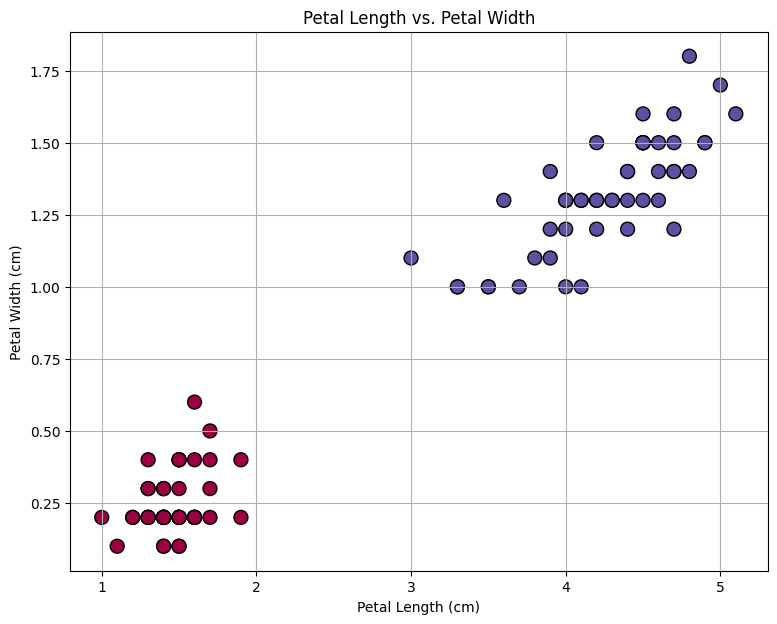

In [8]:
import matplotlib.pyplot as plt

# Plotting petal length vs. petal width
plt.figure(figsize=(9, 7))
plt.scatter(df_binary['petal length (cm)'], df_binary['petal width (cm)'], c=y, cmap='Spectral', s=100, edgecolor='k')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.grid()
plt.show()

In [9]:
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.neural_network import MLPClassifier as MLP
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

In [10]:
max = [0,0]
for i in range(5):
    
    classificador=MLP(hidden_layer_sizes=(22,), max_iter=10000, activation="tanh", 
                          learning_rate_init=0.1, tol = 1e-5, random_state=i)
    result = cross_validate(classificador, X, y, cv = KFold(n_splits=10, shuffle=True, random_state=i), 
    scoring = {"accuracy": make_scorer(accuracy_score)} , return_estimator = True)
    
    #Calculando a acurácia do teste
    accuracy =  np.mean(result['test_accuracy'])
    print("Accurácia: ",  accuracy)

    if (max[0] < accuracy):
        max[0] = accuracy
        max[1] = i
        bb = classificador
print(f"Melhor resultado: \n Acurácia: {max[0]}\n Seed: {max[1]}")

Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Accurácia:  1.0
Melhor resultado: 
 Acurácia: 1.0
 Seed: 0


In [11]:
#IMPLEMENTAR UMA VERSÃO QUE UTILIZA CORRETAMENTE O CROSS_VAL_PREDICT

In [12]:
bb.fit(X, y)
Predições=bb.predict(X)
print("Predictions:", Predições)
print("Labels:", y)

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


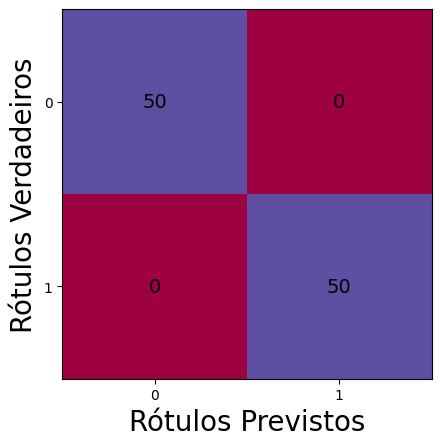

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = np.unique(y)
Predição = cross_val_predict(bb, X, y, cv = KFold(n_splits=10, shuffle=True, random_state=0))
conf_matrix = confusion_matrix(y, Predição, labels=unique_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=unique_labels)
disp.plot(cmap="Spectral", colorbar=False, values_format='d')
for text in disp.im_.axes.texts:
    text.set_color('black')
    text.set_fontsize(14)
plt.xlabel('Rótulos Previstos', fontsize=20)
plt.ylabel('Rótulos Verdadeiros', fontsize=20)
plt.show()

In [14]:
y = df_binary['species'].values
X = df_binary.iloc[:, [0,1]].values
bb.fit(X, y)
Predições=bb.predict(X)

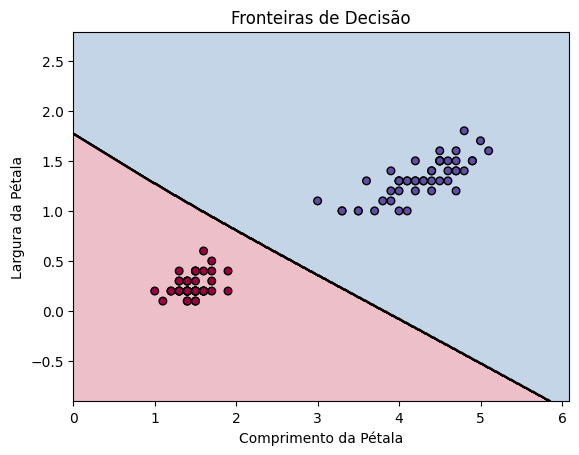

In [15]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid') 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

## Implementando o Algoritmo Genético

In [58]:
import deap
from functools import partial
from deap import base, creator, tools, algorithms
import random
import pandas as pd
import numpy as np
from deap import base, creator, tools, algorithms

In [59]:
# Converter as linhas do DataFrame (excluindo a classe) em listas de características
individuos_iniciais = df[['petal length (cm)', 'petal width (cm)']].values.tolist()
classes_iniciais = df['species'].tolist()

# Criar a classe de aptidão e o indivíduo
creator.create("FitnessMax", base.Fitness, weights=(1.0,))  # Maximização
creator.create("Individual", list, fitness=creator.FitnessMax)

C:\Users\Gabriel\miniconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Gabriel\miniconda3\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [60]:
# # Função de distância (temporária)
# def distance_function(x0d, x1d, discrete, continuous, class_name):
#     # Função de exemplo para calcular distância
#     return np.linalg.norm(np.array(list(x0d.values())) - np.array(list(x1d.values())))

In [61]:
continuous = ['petal length (cm)', 'petal width (cm)']
discrete=[]
class_name = 'species'
idx_features = ['petal length (cm)', 'petal width (cm)']

min_vals = df_binary[continuous].min().values
max_vals = df_binary[continuous].max().values
print(min_vals, max_vals)

[1.  0.1] [5.1 1.8]


In [62]:
def distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals):
    # Converte dicionários em arrays
    u = np.array(list(x0d.values()))
    v = np.array(list(x1d.values()))

    # Normaliza os vetores (evita divisão por zero)
    denom = max_vals - min_vals
    denom[denom == 0] = 1  # Garante que não haja divisão por zero
    u_norm = (u - min_vals) / denom
    v_norm = (v - min_vals) / denom

    # Calcula o numerador (distância quadrada entre vetores normalizados)
    numerator = np.sum((u_norm - v_norm) ** 2)

    # Calcula o denominador (norma quadrada normalizada)
    denominator = np.sum(u_norm ** 2) + np.sum(v_norm ** 2)

    return numerator / denominator if denominator != 0 else 0.0

In [63]:
# x_referência=individuos_iniciais[5]
# x_teste=individuos_iniciais[2] 

# x0d = {idx_features[i]: val for i, val in enumerate(x_referência)}
# x1d = {idx_features[i]: val for i, val in enumerate(x_teste)}

# print(x1d, x0d)

In [64]:
# dist = distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)
# print(dist)

In [92]:
idx=5
def create_individual():
    return individuos_iniciais[idx] + [classes_iniciais[idx]]  

In [93]:
def fitness_sso_shared(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features,
                       distance_function, x1, population, sig=0.5, beta=1.0):
    # Converter listas para dicionários com nomes das features
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    # Similaridade entre as instâncias
    sim_ratio = 0.0 if x0d == x1d else 1.0
    
    record_similarity = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)

    # Previsão com DataFrame nomeado
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)

    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]
    
    # Similaridade de saída
    target_similarity = 1.0 if y0 == y1 else 0.0

    # Avaliação original (fitness antes do compartilhamento)
    raw_fitness_sso = float(sim_ratio) + float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)

    # --- FITNESS SHARING ---
    def sharing_function(d, sig, beta):
        return 1 - (d / sig) ** beta if d < sig else 0.0

    #Calcular soma das funções de compartilhamento com os outros indivíduos da população
    sharing_sum = 0.0
    for other in population:
        other_d = {idx_features[i]: val for i, val in enumerate(other[:len(idx_features)])}
        dist = distance_function(x0d, other_d, discrete, continuous, class_name, min_vals, max_vals)
        sharing_sum += sharing_function(dist, sig, beta)

    #Garantir que não dividimos por zero
    if sharing_sum == 0.0:
        sharing_sum = 1.0

    shared_fitness = raw_fitness_sso / sharing_sum
    
    return shared_fitness,
    
def fitness_sdo_shared(x0, bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features,
                       distance_function, x1, population, sig=0.5, beta=1.0):
        # Converter listas para dicionários com nomes das features
    x0d = {idx_features[i]: val for i, val in enumerate(x0)}
    x1d = {idx_features[i]: val for i, val in enumerate(x1)}
    
    # Similaridade entre as instâncias
    sim_ratio = 0.0 if x0d == x1d else 1.0
    
    record_similarity = 1.0 - distance_function(x0d, x1d, discrete, continuous, class_name, min_vals, max_vals)

    # Previsão com DataFrame nomeado
    x0_df = pd.DataFrame([x0], columns=idx_features)
    x1_df = pd.DataFrame([x1], columns=idx_features)

    y0 = bb.predict(x0_df)[0]
    y1 = bb.predict(x1_df)[0]
    
    # Similaridade de saída
    target_similarity = 1.0 if y0 != y1 else 0.0

    # Avaliação original (fitness antes do compartilhamento)
    raw_fitness_sdo = float(sim_ratio) + float(alpha1) * float(record_similarity) + float(alpha2) * float(target_similarity)

    # --- FITNESS SHARING ---
    def sharing_function(d, sig, beta):
        return 1 - (d / sig) ** beta if d < sig else 0.0

    #Calcular soma das funções de compartilhamento com os outros indivíduos da população
    sharing_sum = 0.0
    for other in population:
        other_d = {idx_features[i]: val for i, val in enumerate(other[:len(idx_features)])}
        dist = distance_function(x0d, other_d, discrete, continuous, class_name, min_vals, max_vals)
        sharing_sum += sharing_function(dist, sig, beta)

    #Garantir que não dividimos por zero
    if sharing_sum == 0.0:
        sharing_sum = 1.0

    shared_fitness = raw_fitness_sdo / sharing_sum
    
    return shared_fitness,

In [94]:
#Reprodução
def cxBlendWithClass(ind1, ind2, alpha=0.5):
   
    for i, (x1, x2) in enumerate(zip(ind1[:-1], ind2[:-1])):  # Ignorar a última coluna (classe)
        gamma = (1. + 2. * alpha) * random.random() - alpha
        ind1[i] = (1. - gamma) * x1 + gamma * x2
        ind2[i] = gamma * x1 + (1. - gamma) * x2
    
    # Manter a classe original dos indivíduos sem alterar
    ind1[-1] = ind1[-1]  # A classe de ind1 permanece inalterada
    ind2[-1] = ind2[-1]  # A classe de ind2 permanece inalterada
    
    return ind1, ind2

In [95]:
#Mutação
#mu é a média da distribuição gaussiana e sigma o desvio padrão

def mutGaussianWithClass(individual, mu, sigma, indpb, min_vals=min_vals, max_vals=max_vals):
    # Aplica mutação apenas às características numéricas, ignorando a última posição (classe)
    for i in range(len(individual) - 1):  # Ignorar a última coluna (classe)
        if random.random() < indpb:
            individual[i] += random.gauss(mu, sigma)  # Aplica a mutação nas características numéricas
            
            # Aplica o clipping se min_vals e max_vals forem fornecidos
            if min_vals is not None and max_vals is not None:
                individual[i] = np.clip(individual[i], min_vals[i], max_vals[i])

    return individual,  # Retorna o indivíduo como tupla

In [96]:
#Criando indivíduos que estão próximos e resultam numa mesma classe
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial
import warnings
warnings.filterwarnings("ignore", message=".*X has feature names, but MLPClassifier was fitted without feature names.*")

# Definir a função evaluate DEPOIS que a população foi criada
def evaluate(individual):
    alpha1 = 0.5
    alpha2 = 1
    eta = 0
    discrete = []
    continuous = ['petal length (cm)', 'petal width (cm)']
    class_name = 'species'
    idx_features = ['petal length (cm)', 'petal width (cm)']
    return fitness_sso_shared(individual[:2], bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi, population, sig=0.2, beta=1.0)
# Configuração da toolbox

toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", cxBlendWithClass, alpha=0.5)
toolbox.register("mutate", mutGaussianWithClass, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial

# Criar a população inicial
population = toolbox.population(n=150)

# for i, ind in enumerate(population):
#     print(f"Indivíduo {i+1}: {ind}")

# Parâmetros do algoritmo
ngen = 10  # Número de gerações
cxpb, mutpb = 0.5, 0.2  # Probabilidades de cruzamento e mutação

# import warnings
# warnings.filterwarnings("ignore", message="X has feature names, but MLPClassifier was fitted without feature names")

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_semelhantes = [ind[:2] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_semelhantes}")

Melhor indivíduo: [np.float64(0.8662868007205943), np.float64(-1.959799412734072), 0], Fitness: (np.float64(93.92826515048064),)
Novos indivíduos gerados: [[np.float64(2.0796493933283626), np.float64(-0.2565260272411145)], [np.float64(1.1233344222064228), np.float64(1.0375212026101754)], [np.float64(-2.0309183431163422), np.float64(0.09427403606066505)], [np.float64(3.109778121495751), np.float64(-0.23384404276649795)], [np.float64(1.4587448220215873), np.float64(-0.007900620938972536)], [np.float64(0.8897475960538486), np.float64(0.8986124009534526)], [np.float64(1.059213917096964), np.float64(0.036135292331918464)], [np.float64(3.1684005866771883), np.float64(0.09573196262336138)], [np.float64(0.917738393542847), np.float64(0.07760443949582917)], [np.float64(1.0792677491095848), np.float64(0.21143855484186508)], [np.float64(1.2065392149949887), np.float64(0.13875903733025213)], [np.float64(1.178938170756174), np.float64(0.1513944489153081)], [np.float64(-0.5118226431482633), np.float

In [97]:
#Criando indivíduos que estão próximos e resultam numa classe diferente
individuo_inicial = individuos_iniciais[idx] 
xi=individuo_inicial

# Definir a função evaluate DEPOIS que a população foi criada
def evaluate(individual):
    alpha1 = 0.5
    alpha2 = 1
    eta = 0.8
    discrete = []
    continuous = ['petal length (cm)', 'petal width (cm)']
    class_name = 'species'
    idx_features = ['petal length (cm)', 'petal width (cm)']
    return fitness_sdo_shared(individual[:2], bb, alpha1, alpha2, eta, discrete, continuous, class_name, idx_features, distance_function, xi, population, sig=0.2, beta=1.0)
# Configuração da toolbox

toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", cxBlendWithClass, alpha=0.5)
toolbox.register("mutate", mutGaussianWithClass, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)  # Passar o indivíduo inicial aqui

# Criar a população inicial

# Criar a população inicial
population = toolbox.population(n=100)

# for i, ind in enumerate(population):
#     print(f"Indivíduo {i+1}: {ind}")

# Parâmetros do algoritmo
ngen = 10  # Número de gerações
cxpb, mutpb = 0.5, 0.2  # Probabilidades de cruzamento e mutação

# import warnings
# warnings.filterwarnings("ignore", message="X has feature names, but MLPClassifier was fitted without feature names")

# Executa o algoritmo genético
result, log = algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)

# Exibir o melhor resultado
best_individual = tools.selBest(population, 1)[0]
print(f"Melhor indivíduo: {best_individual}, Fitness: {best_individual.fitness.values}")

# Filtrar e armazenar os novos indivíduos gerados
novos_individuos_diferentes = [ind[:2] for ind in population]  # Pegando apenas as características

print(f"Novos indivíduos gerados: {novos_individuos_diferentes}")

Melhor indivíduo: [np.float64(1.738961870395846), np.float64(0.5365548472358515), 0], Fitness: (np.float64(21.399801723042444),)
Novos indivíduos gerados: [[np.float64(-4.36624277077923), np.float64(0.5608630233615816)], [np.float64(1.7177309691870548), np.float64(1.7373992369028548)], [np.float64(2.7493382107062776), np.float64(0.2231890028248224)], [np.float64(1.0), np.float64(0.2223226242928587)], [np.float64(0.6488953427329595), np.float64(0.09174281001741079)], [np.float64(1.8788013395945842), np.float64(0.1)], [np.float64(1.6009430743040116), np.float64(1.6020061193067148)], [np.float64(1.122012321744288), np.float64(4.031097110373737)], [np.float64(-0.15709456509352582), np.float64(1.8477438247245275)], [np.float64(0.8261338048065288), np.float64(0.033575146125910726)], [np.float64(1.0), np.float64(0.033575146125910726)], [np.float64(4.635563490196353), np.float64(2.843650227624777)], [np.float64(0.875648118374356), np.float64(0.10313518893893878)], [np.float64(0.984809210107485

In [98]:
SSO=pd.DataFrame(novos_individuos_semelhantes)
SDO=pd.DataFrame(novos_individuos_diferentes)
print(SSO.head())
print(SDO.head())

          0         1
0  2.079649 -0.256526
1  1.123334  1.037521
2 -2.030918  0.094274
3  3.109778 -0.233844
4  1.458745 -0.007901
          0         1
0 -4.366243  0.560863
1  1.717731  1.737399
2  2.749338  0.223189
3  1.000000  0.222323
4  0.648895  0.091743


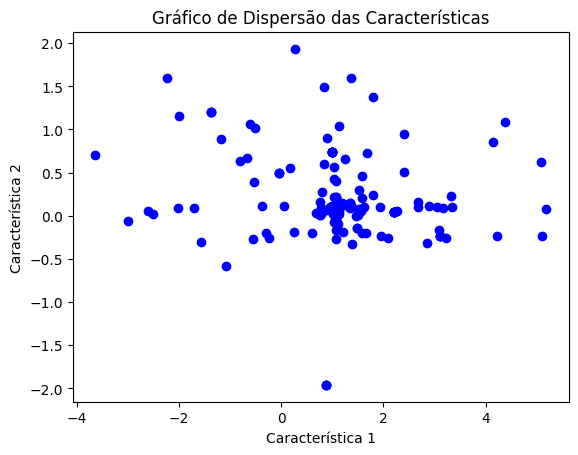

In [99]:
import matplotlib.pyplot as plt

plt.scatter(SSO[0], SSO[1], c='b')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

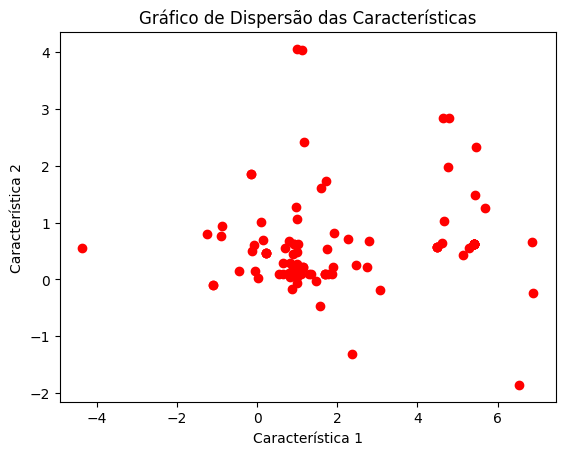

In [100]:
import matplotlib.pyplot as plt

plt.scatter(SDO[0], SDO[1], c='r')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Gráfico de Dispersão das Características')
plt.show()

In [101]:
print(xi)

[1.7, 0.4]


In [102]:
XSSO=SSO.iloc[:,[0,1]].values
XSDO=SDO.iloc[:,[0,1]].values
#print(XSSO)
#print(XSDO)

In [103]:
XTOTAL = np.vstack((XSSO, XSDO))
#print(XTOTAL)

In [104]:
ytotal= bb.predict(XTOTAL)
ytotal
pd.Series(ytotal).value_counts()

0    204
1     46
Name: count, dtype: int64

In [105]:
from sklearn.tree import DecisionTreeClassifier
ClassificadorDT = DecisionTreeClassifier(max_depth=15, random_state=42)
ClassificadorDT.fit(XTOTAL, ytotal)

DecisionTreeClassifier(max_depth=15, random_state=42)

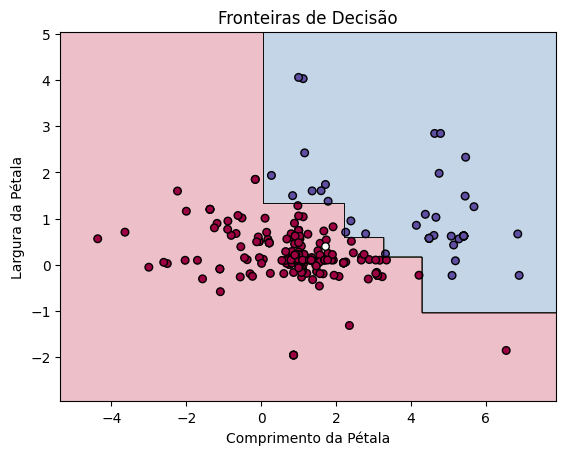

In [106]:
x_min, x_max = XTOTAL[:, 0].min() - 1, XTOTAL[:, 0].max() + 1
y_min, y_max = XTOTAL[:, 1].min() - 1, XTOTAL[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = ClassificadorDT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=0.2, linestyles='solid') 
plt.scatter(XTOTAL[:, 0], XTOTAL[:, 1], c=ytotal, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

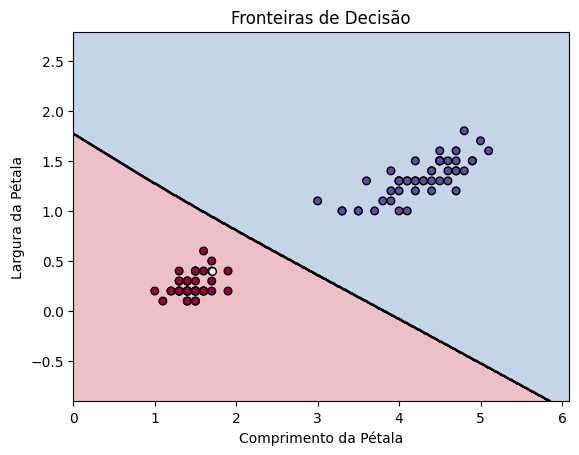

In [107]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

#Definindo a escala dos gráficos com base nos valores máximos e mínimos das características da pétala 
#LARGURA (eixo Y)
#COMPRIMENTO (eixo X)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

#A função np.meshgrid cria uma grade de pontos em um espaço bidimensional 
#O np.arange gera os valores no intervalo definido por xmax, xmin, ymax, ymin com o passo de 0.01
#xx e yy são matrizes que contem as coordenadas x e y de cada ponto da grade

Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#np.c_[xx.ravel(), yy.ravel()] combina as matrizes xx e yy numa matriz e coordenadas
#O classificador black box faz então previsões sobre estas coordenadas
#A variável Z contem as classes previstas para cadaa um dos pontos da grade
#Por fim, reorganizamos Z para que ele tenha a mesma forma que xx

# Plotar as fronteiras de decisão e os pontos de dados
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
contour = plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid') 
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão')
plt.show()

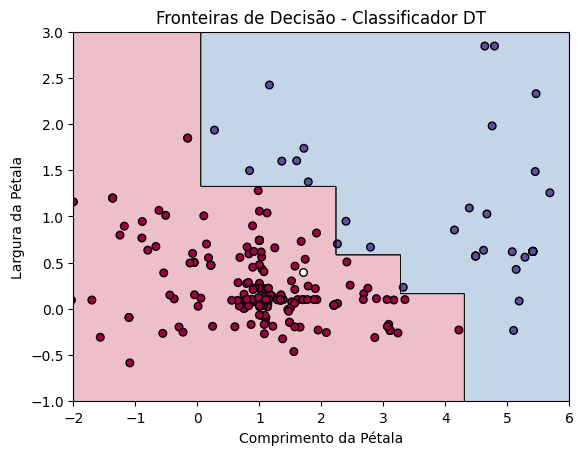

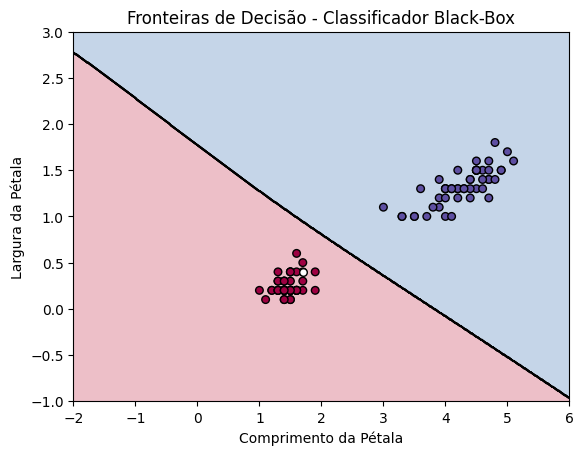

In [108]:
# Definir os limites manualmente
x_min = -2  # Substitua pelo limite desejado para o eixo X
x_max = 6   # Substitua pelo limite desejado para o eixo X
y_min = -1  # Substitua pelo limite desejado para o eixo Y
y_max = 3   # Substitua pelo limite desejado para o eixo Y

# Criar a grade de pontos com os valores fixos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Gráfico 1
Z = ClassificadorDT.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
plt.contour(xx, yy, Z, colors='black', linewidths=0.2, linestyles='solid')
plt.scatter(XTOTAL[:, 0], XTOTAL[:, 1], c=ytotal, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão - Classificador DT')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

# Gráfico 2
Z = bb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap="Spectral")
plt.contour(xx, yy, Z, colors='black', linewidths=1, linestyles='solid')
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap="Spectral", edgecolor='k')
plt.scatter(xi[0], xi[1], color='w', s=30, label='Ponto Destacado', edgecolor='black')  # Destacando o ponto
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão - Classificador Black-Box')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

## RESULTADOS INICIAIS
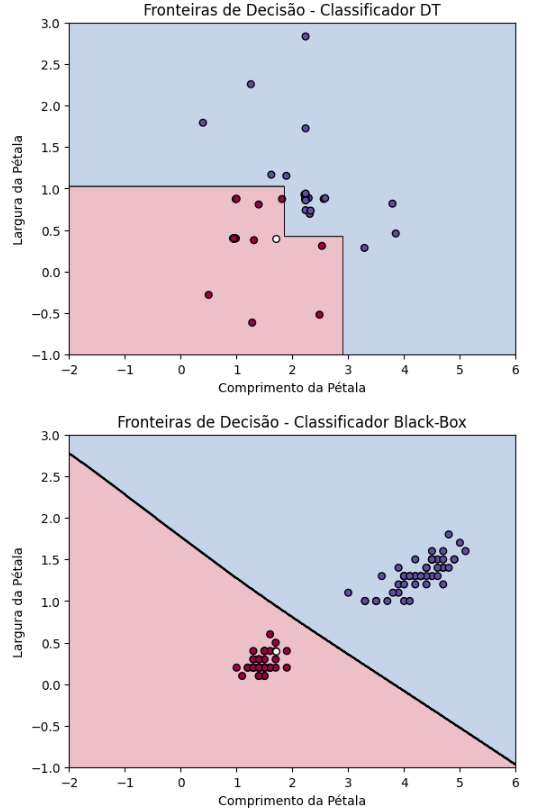  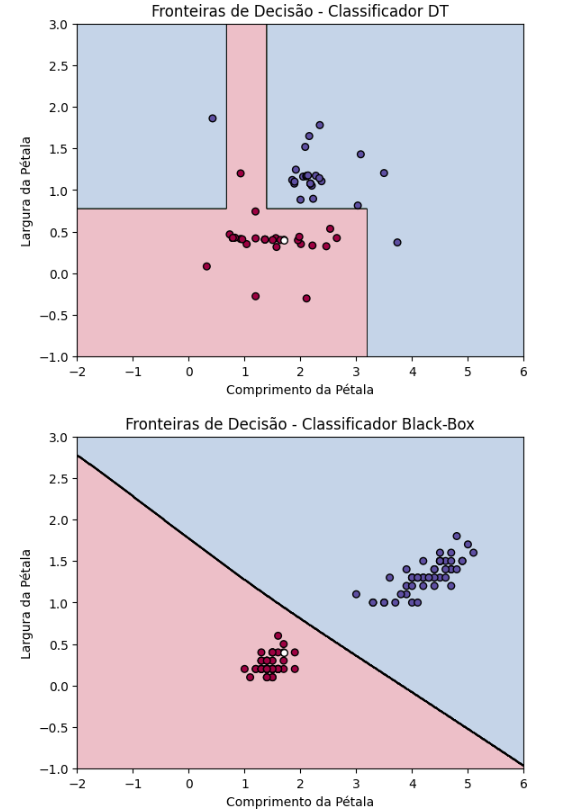

alpha1 = 0.7

alpha2 = 0.5
eta = 0.3

population = toolbox.population(n=30)

ngen = 10 

cxpb, mutpb = 0.5, 0.2

toolbox.register("mate", cxBlendWithClass, alpha=0.5)

toolbox.register("mutate", mutGaussianWithClass, mu=0, sigma=1, indpb=0.2)

toolbox.register("select", tools.selTournament, tournsize=3)

# RESULTADOS FINAIS
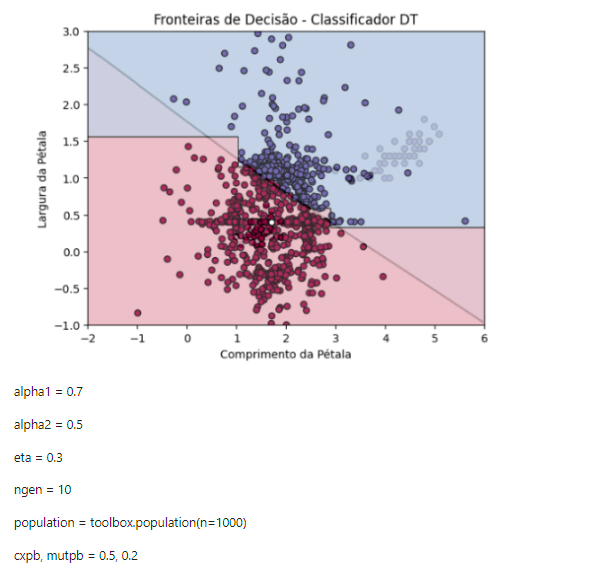

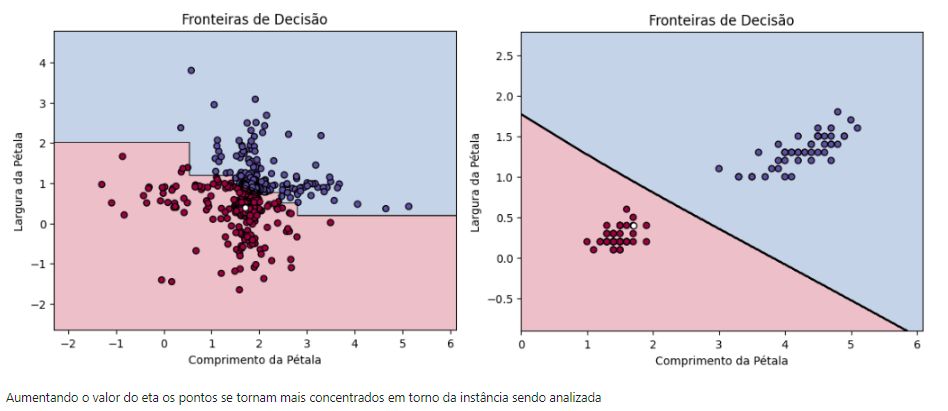

# Pontos mais distantes da fronteira

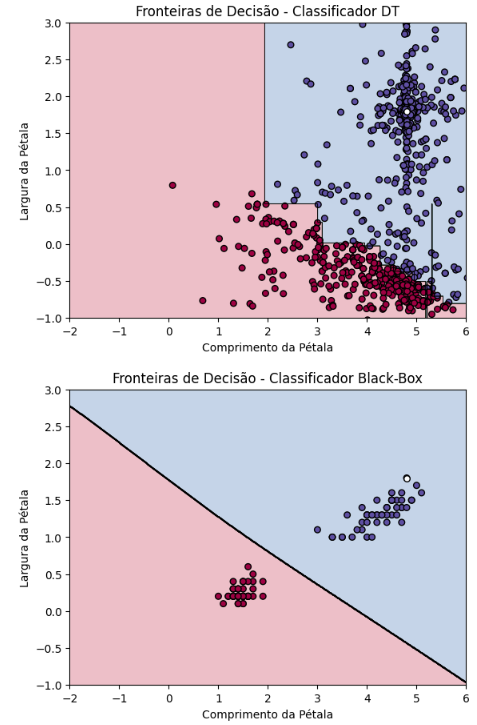 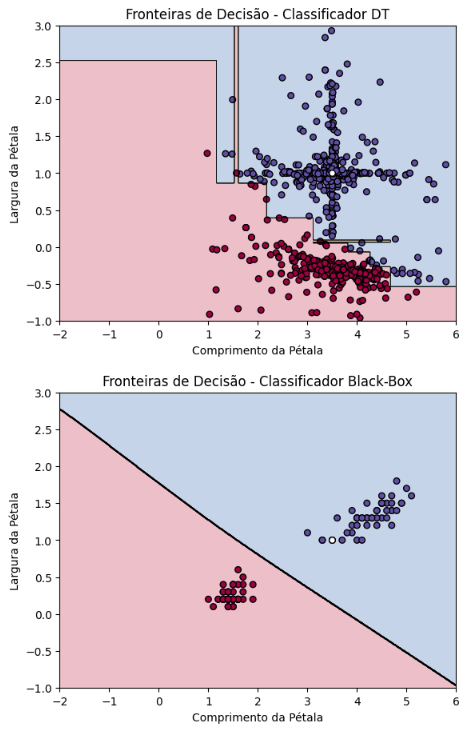

# Fitness Sharing
### Realmente as fronteiras de decisão ficam mais parecidadas globalmente 
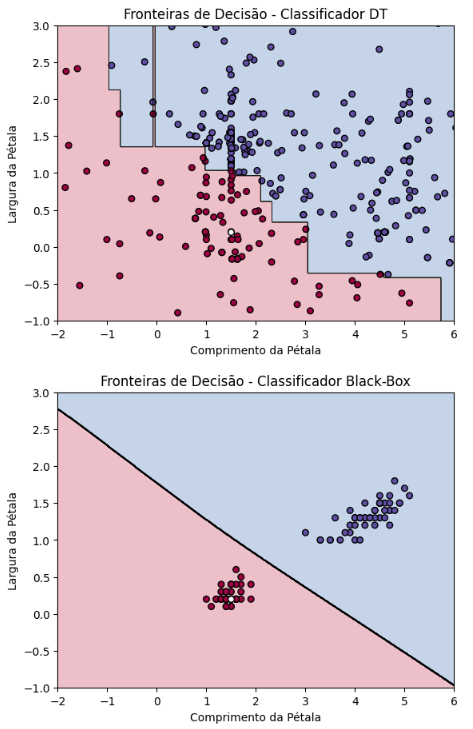
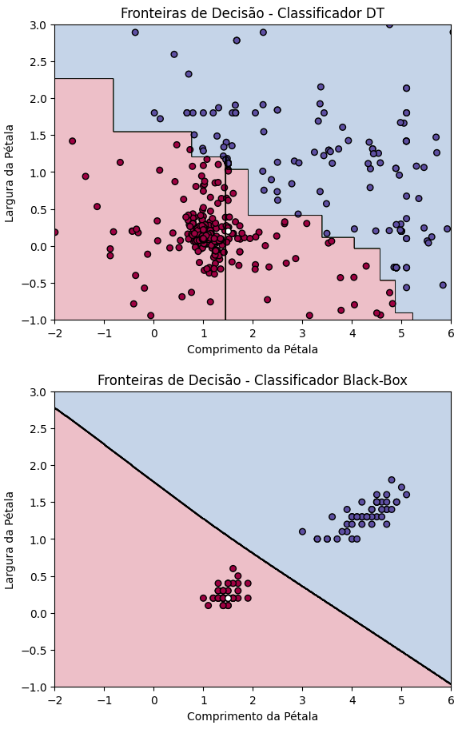

# Resultado bom fitness sharing
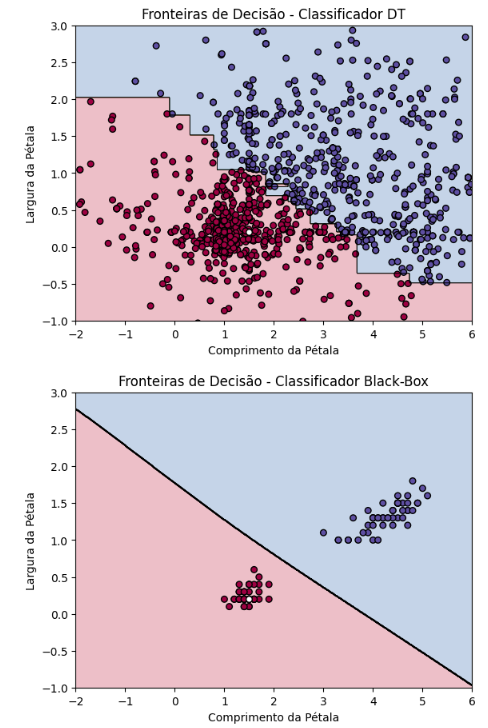

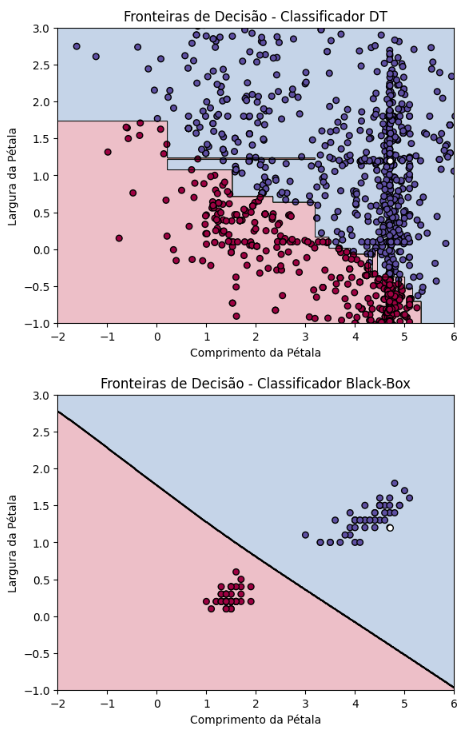

# Configurações usadas
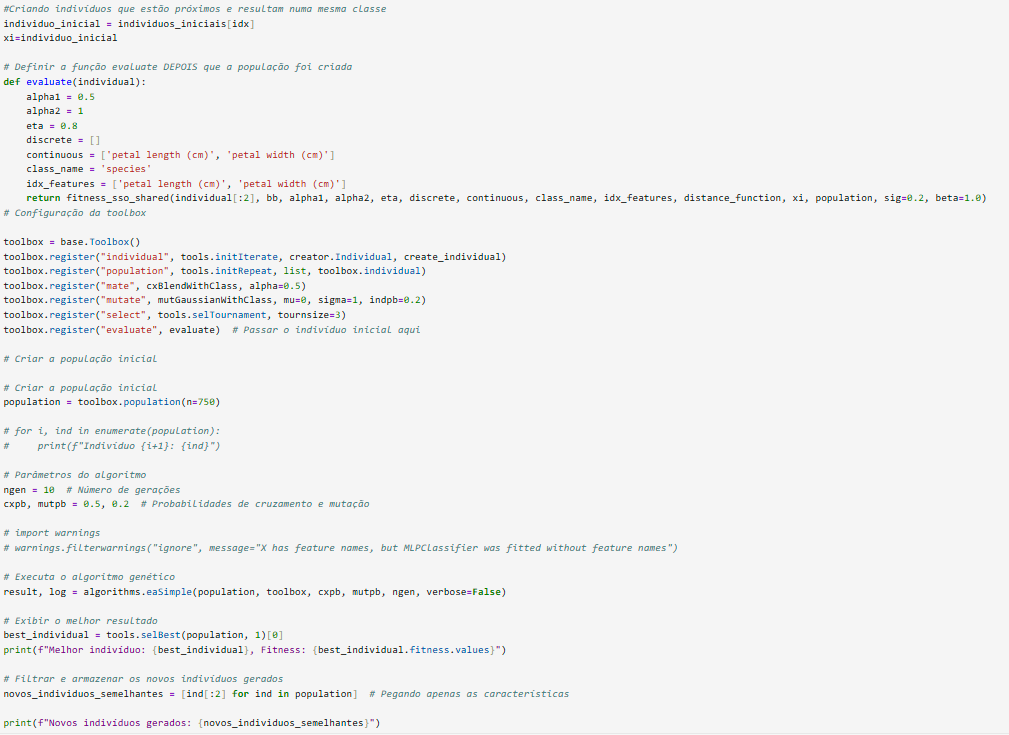
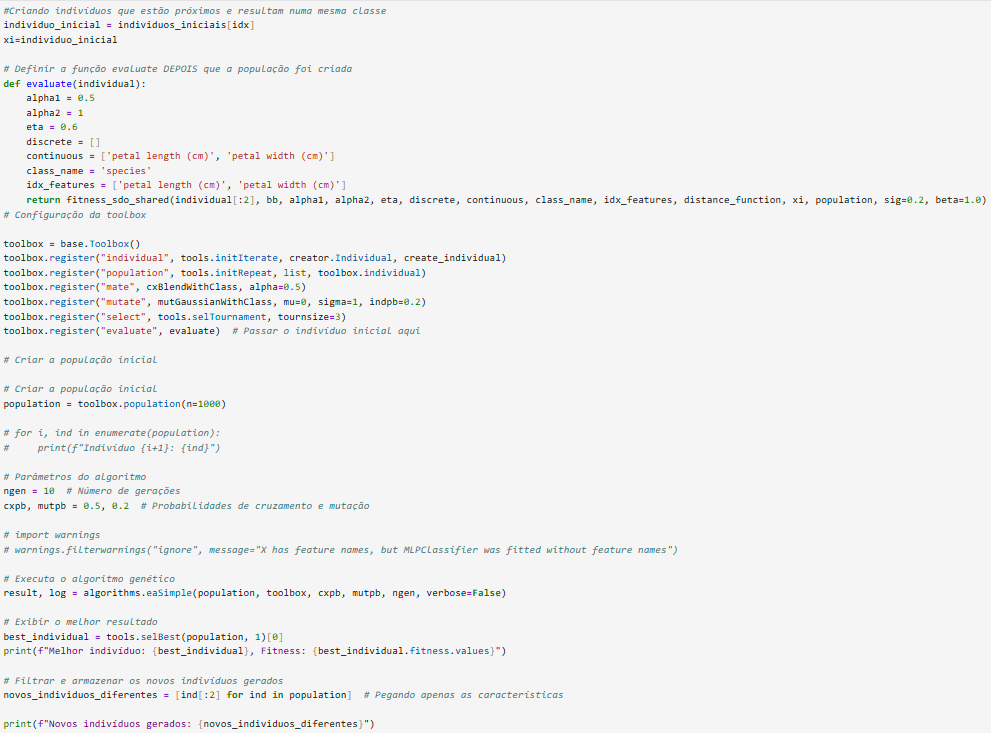

### Alterei o valor de eta para maior
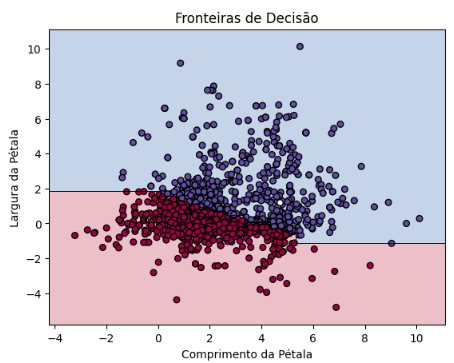